In [1]:
import os
from pathlib import Path
import obspy
from diting import DiTing_EQDet_PhasePick_predict

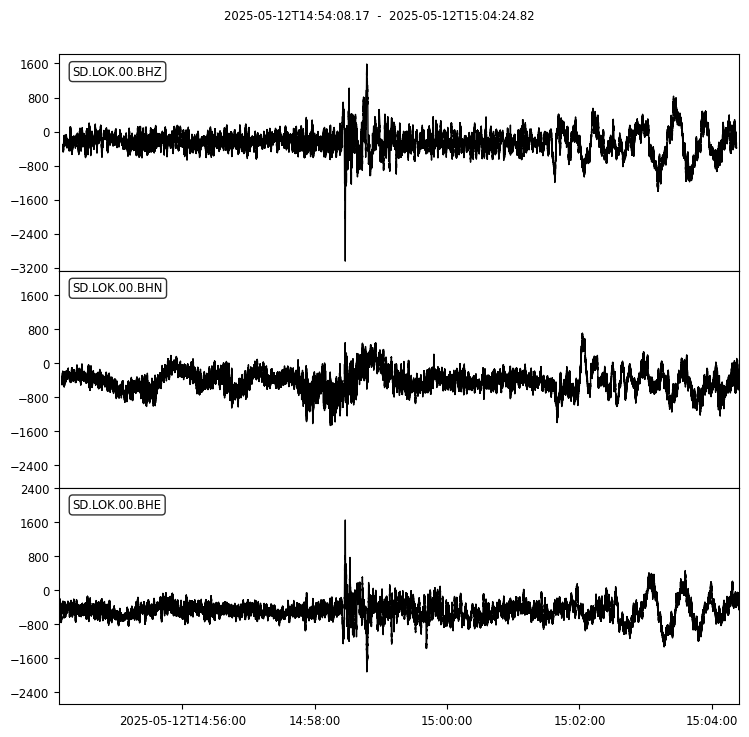

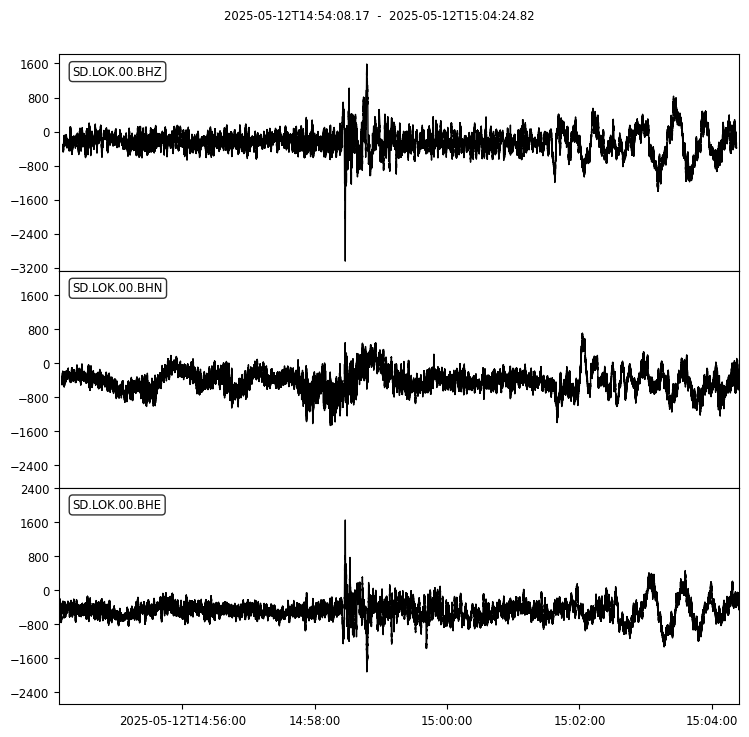

In [2]:
stream = obspy.read("./IGP2025jgmk/SD_LOK.mseed")
stream.plot()

In [3]:
max_bt = max(stream[i].stats.starttime for i in range(3))
mix_et = min(stream[i].stats.endtime for i in range(3))

In [4]:
inputdata = stream.trim(starttime=max_bt, endtime=mix_et)
inputdata

3 Trace(s) in Stream:
SD.LOK.00.BHE | 2025-05-12T14:54:11.750000Z - 2025-05-12T15:04:22.420000Z | 100.0 Hz, 61068 samples
SD.LOK.00.BHN | 2025-05-12T14:54:11.750000Z - 2025-05-12T15:04:22.420000Z | 100.0 Hz, 61068 samples
SD.LOK.00.BHZ | 2025-05-12T14:54:11.750000Z - 2025-05-12T15:04:22.420000Z | 100.0 Hz, 61068 samples

In [5]:
events, confidence, num = DiTing_EQDet_PhasePick_predict(stream=inputdata, p_th=0.01, s_th=0.01, det_th=0.05)

 17%|█▋        | 1/6 [00:00<00:02,  1.80it/s]

API请求时间： 0.5412547588348389


 33%|███▎      | 2/6 [00:01<00:02,  1.95it/s]

API请求时间： 0.4613776206970215


 50%|█████     | 3/6 [00:01<00:01,  2.00it/s]

API请求时间： 0.46416211128234863


 67%|██████▋   | 4/6 [00:02<00:00,  2.02it/s]

API请求时间： 0.46956658363342285


 83%|████████▎ | 5/6 [00:02<00:00,  2.11it/s]

API请求时间： 0.41960740089416504


100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

API请求时间： 0.47560977935791016


In [6]:
sampling_rate = inputdata[0].stats.sampling_rate

if num > 0:
    for i in range(num):
        event = events[i]
        #print(event)
        npt = event[1][0][0]
        nsp = event[2][0][0]
        #print("npt", npt)
        #p_time = start_time + self.tr/sampling_rate + npt/sampling_rate
        try:
            p_time = max_bt + npt/sampling_rate
        except:
            p_time = "nan"
        try:
            s_time = max_bt + nsp/sampling_rate
        except:
            s_time = "nan"
        try:
            psdiff = (nsp - npt)/sampling_rate
        except:
            psdiff = "nan"
        print(f"P_time={p_time}, Pp={event[1][0][1]}, S_time={s_time}, Sp={event[2][0][1]}",)

P_time=2025-05-12T14:58:25.380000Z, Pp=0.278, S_time=nan, Sp=nan
